### 1

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread('Image 3.jpeg') # Already grayscaled so no filtering required

# cv2.imshow('image', img1)
# cv2.waitKey(0)

-1

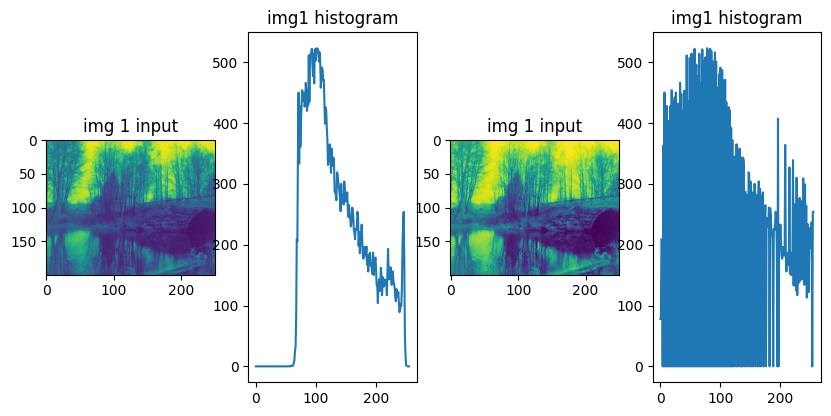

In [77]:
# calculating histogram

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256]) 

# histogram equ
img1equ = cv2.equalizeHist(img1)

hist1equ = cv2.calcHist([img1equ],[0],None,[256],[0,256]) 

plt.subplot(2, 4, 1)
plt.imshow(img1)
plt.title('img 1 input')

plt.subplot(2, 4, 2)
plt.title('img1 histogram')
plt.plot(hist1)

plt.subplot(2, 4, 3)
plt.imshow(img1equ)
plt.title('img 1 input')

plt.subplot(2, 4, 4)
plt.title('img1 histogram')
plt.plot(hist1equ)
plt.show()

b) 

1. Contrast Improvement:

    - Effect: Histogram equalization redistributes the pixel intensity values across the entire range of possible values (0 to 255 for an 8-bit image). This process enhances the contrast, making the details in both the dark and bright areas more visible.

    - Result: After histogram equalization, the image appears more dynamic, with enhanced detail and contrast that were previously not as distinguishable.

2. Noticeable Artifacts or Limitations:

    - Artifacts: Sometimes, histogram equalization can introduce artifacts such as a noisy or grainy appearance, especially in regions of the image with uniform intensity. This happens because the algorithm might amplify small variations in pixel intensities, making them more noticeable.

    - Limitations:

        + Over-Enhancement: In some cases, histogram equalization can lead to over-enhancement, where the contrast is increased too much, making the image look unnatural.

        + Loss of Detail: If the original image has large areas of similar intensity, histogram equalization might not effectively enhance the contrast for those areas, leading to potential loss of detail.

### 2

In [ ]:
img2 = cv2.cvtColor(cv2.cvtColor(cv2.imread("Image 1.jpg"), cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY) # converting to BGR gives no effect but grayscalling is a must

# canny
canny_edge = cv2.Canny(img2, 75,100)

#Sobel
sobel_x = cv2.Sobel(img2, cv2.CV_64F,1,0,3)
sobel_y = cv2.Sobel(img2, cv2.CV_64F,0,1,3)
sobel_comb = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)

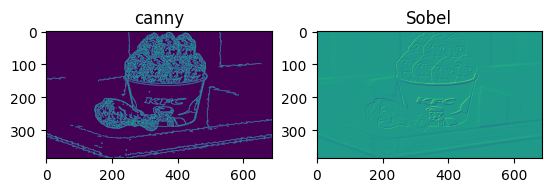

In [22]:
plt.subplot(2, 2, 1)
plt.title("canny")
plt.imshow(canny_edge)

plt.subplot(2, 2, 2)
plt.title("Sobel")
plt.imshow(sobel_comb)

plt.show()

The Canny edge detection method provides clearer edges for this image. This is because the Canny method uses a multi-stage process, including noise reduction, gradient calculation, non-maximum suppression, and edge tracking by hysteresis. These steps help to accurately and distinctly detect a wide range of edges, making them more defined and clear.

On the other hand, the Sobel method, while effective for detecting edges, tends to produce less sharp and more gradient-like edges. It calculates the gradient of image intensity at each pixel, highlighting regions of high spatial frequency corresponding to edges, but lacks the additional refinement steps that the Canny method includes.

### 3

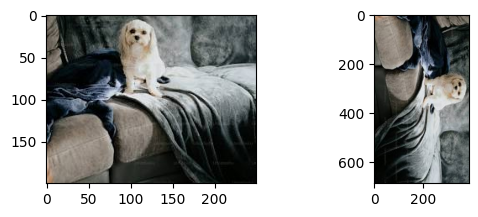

In [44]:
img3 = cv2.cvtColor(cv2.imread("Image 2.jpeg"), cv2.COLOR_BGR2RGB)

# Rotate ans scaled up 2 times
scale_percent = 100
width = int(img2.shape[1] * scale_percent / 100)
height = int(img2.shape[0] * scale_percent / 100)
new_size = (width, height)

img3_processed = cv2.rotate(cv2.resize(img3, new_size, interpolation=cv2.INTER_CUBIC), cv2.ROTATE_90_CLOCKWISE)

plt.subplot(2, 2, 1)
plt.imshow(img3)

plt.subplot(2, 2, 2)
plt.imshow(img3_processed)

plt.show()

# cv2.imshow('image', cv2.resize(img3, new_size, interpolation=cv2.INTER_CUBIC))
# cv2.waitKey(0)

In [47]:
def featureDetect(img, detectType):
    detector = None
    if detectType.lower() == 'orb':
        orb = cv2.ORB_create()
        detector = orb
    else:
        sift = cv2.SIFT_create()
        detector = sift
    kp, desc = detector.detectAndCompute(img, None)
    return kp, desc

imgkporb, imgdescorb = featureDetect(img3, 'orb')
imgprockporb, imgprocdescorb = featureDetect(img3_processed, 'orb')

imgkpsift, imgdescsift = featureDetect(img3, 'sift')
imgprockpsift, imgprocdescsift = featureDetect(img3_processed, 'sift')    

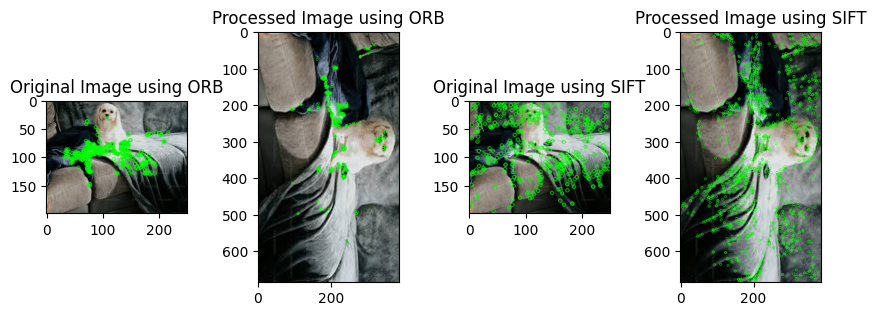

In [65]:
imgorb = cv2.drawKeypoints(img3, imgkporb, None, (0, 255, 0), flags=0)
imgprocorb = cv2.drawKeypoints(img3_processed, imgprockporb, None, (0, 255, 0), flags=0)
imgsift = cv2.drawKeypoints(img3, imgkpsift, None, (0, 255, 0), flags=0)
imgprocsift = cv2.drawKeypoints(img3_processed, imgprockpsift, None, (0, 255, 0), flags=0)

plt.subplot(2, 4, 1)
plt.imshow(imgorb)
plt.title("Original Image using ORB")

plt.subplot(2, 4, 2)
plt.imshow(imgprocorb)
plt.title("Processed Image using ORB")

plt.subplot(2, 4, 3)
plt.imshow(imgsift)
plt.title("Original Image using SIFT")

plt.subplot(2, 4, 4)
plt.imshow(imgprocsift)
plt.title("Processed Image using SIFT")

plt.subplots_adjust(wspace=0.5)
plt.rcParams["figure.figsize"] = (10, 10)

plt.show()